In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.value_counts()
DATA = data.value_counts()
DATA

Type  Alcohol  Malic  Ash   Alcalinity  Magnesium  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  Color  Hue   Dilution  Proline
1     12.85    1.60   2.52  17.8        95         2.48     2.37        0.26           1.46             3.93   1.09  3.63      1015       1
3     12.36    3.83   2.38  21.0        88         2.30     0.92        0.50           1.04             7.65   0.56  1.58      520        1
2     12.60    1.34   1.90  18.5        88         1.45     1.36        0.29           1.35             2.45   1.04  2.77      562        1
      12.64    1.36   2.02  16.8        100        2.02     1.41        0.53           0.62             5.75   0.98  1.59      450        1
      12.67    0.98   2.24  18.0        99         2.20     1.94        0.30           1.46             2.62   1.23  3.16      450        1
                                                                                                                                         ..
      11.45    2.40   2.4

In [6]:
# Normalizing the numerical data 
data_normal = scale(DATA)

In [7]:
data_normal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
pca = PCA()
pca_values = pca.fit_transform(data)

In [9]:
pca_values

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00, ...,
         1.68878924e-01, -1.64297340e-02,  8.93553535e-02],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00, ...,
         8.89334239e-02, -4.48448723e-02,  1.78962892e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00, ...,
         1.80875713e-01, -5.03578282e-02, -3.94205943e-02],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00, ...,
        -2.09746486e-01,  8.53365516e-02,  3.43716469e-02],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00, ...,
        -3.22197611e-04, -4.65644908e-02,  1.36469328e-01],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00, ...,
         3.92954136e-02,  1.60191386e-02,  1.97873108e-02]])

In [10]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(data)

In [11]:
pca_values

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00,
        -2.60165816e-01,  7.52091943e-01,  5.20108716e-01],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00,
        -1.00497751e+00, -5.01045377e-01,  5.24392343e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00,
         9.77726666e-01,  4.53208097e-01,  6.34321618e-01],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00,
        -4.87427982e+00, -1.00271848e+00,  3.19367037e-01],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00,
        -3.78996410e+00, -3.99557749e-01, -1.01108089e+00],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00,
        -3.36646246e+00,  1.86523066e-01,  7.69306963e-01]])

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06])

In [13]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  ])

In [14]:
pca.components_

array([[-1.55934284e-03,  1.65926191e-03, -6.81019030e-04,
         1.94905197e-04, -4.67130461e-03,  1.78679787e-02,
         9.89831553e-04,  1.56729290e-03, -1.23086954e-04,
         6.00609082e-04,  2.32712720e-03,  1.71381131e-04,
         7.04935892e-04,  9.99821721e-01],
       [ 2.77861762e-03,  1.20426744e-03,  2.15953126e-03,
         4.59399561e-03,  2.64607000e-02,  9.99339902e-01,
         8.74730944e-04, -5.86582556e-05, -1.35399415e-03,
         5.00222716e-03,  1.51142222e-02, -7.64042527e-04,
        -3.50068415e-03, -1.77693551e-02],
       [-1.00919962e-01, -1.83035443e-02, -1.24559463e-01,
        -5.12928854e-02, -9.28099861e-01,  2.99845440e-02,
         4.27611042e-02,  9.02671155e-02, -1.37215147e-02,
         2.62371281e-02, -3.03202978e-01,  2.69922728e-02,
         7.43661999e-02, -4.62655971e-03],
       [-1.47645845e-01, -1.36988601e-01, -1.56739376e-01,
         1.20471220e-02,  3.56990103e-01,  4.75411673e-03,
         7.64520642e-02,  1.72191025e-01, -1.

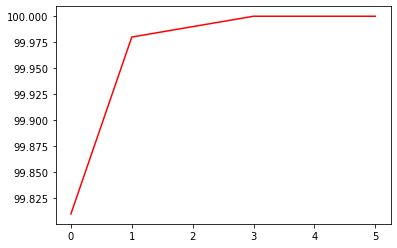

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

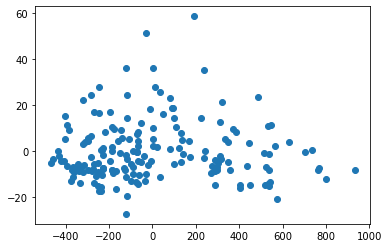

In [16]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

# KMEANS

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,:])
from sklearn.cluster import KMeans

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


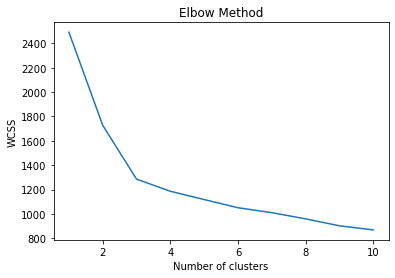

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=42)

In [20]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [22]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.07996036, -0.9221257 , -0.3788889 , -0.46568753,  0.17550695,
        -0.47025072, -0.07393442,  0.04428767,  0.0087608 ,  0.01826487,
        -0.86227808,  0.42450329,  0.24978206, -0.76524984],
       [-1.17152057,  0.87809728, -0.30457633,  0.31894179, -0.66452366,
         0.56488825,  0.87650546,  0.94363903, -0.58558981,  0.58178294,
         0.16718842,  0.48372814,  0.76705349,  1.15834713],
       [ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461]])

In [23]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
1,1,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
2,2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [24]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
